In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn

import sklearn
from sklearn.datasets import fetch_openml
from sklearn.neural_network import MLPClassifier

In [2]:
#load the MNIST dataset 
#Load data from https://www.openml.org/d/554
X,Y = fetch_openml('mnist_784', version=1, return_X_y=True,as_frame = False)

print(f'Each image is represented as vector of shape {X[0].shape}')
print(f'The image is represented in gray scale levels {X[0]}')
print(f'Here it is a label: {Y[0]}')

Each image is represented as vector of shape (784,)
The image is represented in gray scale levels [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   3.  18.
  18.  18. 126. 136. 175.  26. 166. 255. 247. 127.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.  30.  36.

In [3]:
#let's normalize the features so that each value is between [0,1]

# Rescale the data
X = X / 255.

In [4]:
# In a classification problem it is desirable to split the dataset into train and test sets in a 
# way that preserves the same proportions of examples in each class as observed in the 
# original dataset. We can achieve this by setting the “stratify” argument of the function "train_test_split" to the Y component of our dataset.

# We are going to use 500 samples in the train dataset, the remaining ones are used for testing.

In [5]:
from sklearn.model_selection import train_test_split

m_t = 500
x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=m_t/len(Y), stratify=Y)

print(f'Lenght train dataset: {len(y_train)}, Labels and frequencies: \n {list(zip(*np.unique(y_train, return_counts=True)))}')
print(f'Lenght test dataset: {len(y_test)}, Labels and frequencies: \n {list(zip(*np.unique(y_test, return_counts=True)))}')

Lenght train dataset: 500, Labels and frequencies: 
 [('0', 49), ('1', 56), ('2', 50), ('3', 51), ('4', 49), ('5', 45), ('6', 49), ('7', 52), ('8', 49), ('9', 50)]
Lenght test dataset: 69500, Labels and frequencies: 
 [('0', 6854), ('1', 7821), ('2', 6940), ('3', 7090), ('4', 6775), ('5', 6268), ('6', 6827), ('7', 7241), ('8', 6776), ('9', 6908)]


In [6]:
# Function to plot a digit and print the corresponding label
def plot_digit(X_matrix, labels, index):
    print("INPUT:")
    plt.imshow(
        X_matrix[index].reshape(28,28),
        cmap          = plt.cm.gray_r,
        interpolation = "nearest"
    )
    plt.show()
    print(f"LABEL: {labels[index]}")
    return

INPUT:


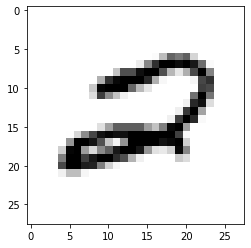

LABEL: 2
INPUT:


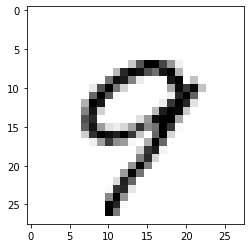

LABEL: 9


In [7]:
#let's try the plotting function
plot_digit(x_train, y_train, 100)
plot_digit(x_test, y_test, 40000)

In [8]:
#import SVC
from sklearn.svm import SVC
#import for Cross-Validation
from sklearn.model_selection import GridSearchCV


def compute_best_SVM_with_CV(kernel_type : str, parameters : dict, x_train : np.ndarray, y_train : np.ndarray) -> tuple:
    '''
    I use Cross validation to find the best SVM on the given parameters. Return the best parameters set together with 
    the corresponding score.
    :param kernel_type: Type of kernel (i.e. linear, rbf, poly)
    :param parameters: Dict containing kernel parameters (e.g. {'C': [1, 10, 100, 1000], 'gamma': [0.01, 0.001], ...})
    :param x_train: Train dataset
    :param y_train: Train labels
    
    :returns: (best_param, best_score, all_scores)
        WHERE:
        best_param: best parameter set (this is a dictionary)
        best_score: best score obtained for the given parameters (float)
        all_scores: all scores computed for each parameter (np.ndarray)
    '''
    SVM_model = SVC(kernel=kernel_type)
    # Use GridSearchCV to find the best parameter set.
    grid = GridSearchCV(SVM_model, parameters)
    grid.fit(x_train,y_train)
    
    print('#####################################')
    print(f'RESULTS for {kernel_type} KERNEL\n')
    
    # Store the best parameters set and print them
    print("Best parameters set found:")
    best_param = grid.best_params_
    print(best_param)
    
    # Store and print the score of the best parameters set
    print("\nScore with best parameters:")
    best_score = grid.best_score_
    print(best_score)
    
    # Store and print all the scores for the given parameters (average of the validation scores)
    print("\nAll scores on the grid:")
    all_scores = grid.cv_results_['mean_test_score']
    print(all_scores)
    
    return best_param, best_score, all_scores

# Choose the grid for parameters of the linear SVM kernel

C_range = [1, 10, 100, 1000]
linear_parameters =dict(C = C_range)
best_param_lin, best_score_lin, all_scores_lin = compute_best_SVM_with_CV('linear', linear_parameters, x_train, y_train)

# Choose the grid for parameters of the rbf SVM kernel
gamma_range = [0.1, 0.01, 0.001]
rbf_parameters =  dict(gamma = gamma_range, C = C_range)
best_param_rbf, best_score_rbf, all_scores_rbf = compute_best_SVM_with_CV('rbf', rbf_parameters, x_train, y_train)

# Choose the grid for parameters of the poly SVM kernel (do not forget to choose the degree)
d_range = [0, 1, 10]
poly_parameters = dict( gamma=gamma_range, C=C_range, degree=d_range)
best_param_poly, best_score_poly, all_scores_poly = compute_best_SVM_with_CV('poly', poly_parameters, x_train, y_train)

#####################################
RESULTS for linear KERNEL

Best parameters set found:
{'C': 1}

Score with best parameters:
0.8340000000000002

All scores on the grid:
[0.834 0.834 0.834 0.834]
#####################################
RESULTS for rbf KERNEL

Best parameters set found:
{'C': 10, 'gamma': 0.01}

Score with best parameters:
0.8719999999999999

All scores on the grid:
[0.668 0.87  0.67  0.686 0.872 0.864 0.686 0.872 0.842 0.686 0.872 0.842]
#####################################
RESULTS for poly KERNEL

Best parameters set found:
{'C': 1, 'degree': 1, 'gamma': 0.01}

Score with best parameters:
0.852

All scores on the grid:
[0.112 0.112 0.112 0.84  0.852 0.444 0.428 0.21  0.112 0.112 0.112 0.112
 0.834 0.84  0.852 0.428 0.302 0.112 0.112 0.112 0.112 0.834 0.834 0.84
 0.428 0.382 0.112 0.112 0.112 0.112 0.834 0.834 0.834 0.428 0.426 0.112]


In [9]:
# Get training and test error for the best SVM model obtained from CV (I need to choose across different kernels 
# too). I just need to look at the best model for each kernel and choose the best one (I can do this by hand).

best_kernel_type, best_parameters = 'rbf' , best_param_rbf
best_SVM = SVC(kernel=best_kernel_type, **best_parameters)
best_SVM.fit(x_train, y_train)

# Compute training and test error for this model (use the usual sklearn built-in functions)
training_error, test_error = 1-best_SVM.score(x_train, y_train), 1-best_SVM.score(x_test, y_test)

print (f"Best SVM training error: {training_error}")
print (f"Best SVM test error: {test_error}")

Best SVM training error: 0.0
Best SVM test error: 0.1050791366906475


In [10]:
def compute_best_MLP_with_CV(activation_f : str, parameters : dict, x_train : np.ndarray, y_train : np.ndarray) -> tuple:
    '''
    I use Cross validation to find the best MLP architecture given a specific activation function. 
    Return the best parameters set together with the corresponding score. Return also the scores for all the other parameters given as input.
    :param activation_f: Type of activation function (e.g. 'logistic', 'tanh', 'relu')
    :param parameters: architectures (e.g. {'hidden_layer_sizes': [(10,), (50,), (10,10,), (50,50,)]})
    :param x_train: Train dataset
    :param y_train: Train labels
    
    :returns: (best_param, best_score, all_scores)
        WHERE:
        best_param: best parameter set (this is a dictionary)
        best_score: best score obtained for the given parameters (float)
        all_scores: all scores computed for each parameter (np.ndarray)
    '''
    
    
    mlp = MLPClassifier(max_iter=1000, alpha=1e-4, solver='sgd', tol=1e-4, learning_rate_init=.1,activation = activation_f)
    
    #Use GridSearchCV to find the various paramters the function returns: best_param, best_score, all_scores
    
    grid = GridSearchCV(estimator=mlp,param_grid=parameters,cv=5)
    grid.fit(x_train, y_train)
    best_param, best_score, all_scores = grid.best_params_, grid.best_score_, grid.cv_results_['mean_test_score']
    
    return best_param, best_score, all_scores

In [11]:
#test various architectures (hidden_layer_sizes) and activation functions (e.g. 'logistic','tanh','relu') for the MLP.


mlp_parameters= dict({'hidden_layer_sizes': [(10,), (50,), (10,10,), (50,50,)]})

log_mlp_best_param, log_mlp_best_score, log_mlp_all_scores = compute_best_MLP_with_CV('logistic', mlp_parameters, x_train, y_train)
tanh_mlp_best_param, tanh_mlp_best_score, tanh_mlp_all_scores = compute_best_MLP_with_CV('tanh', mlp_parameters, x_train, y_train)
relu_mlp_best_param, relu_mlp_best_score, relu_mlp_all_scores = compute_best_MLP_with_CV('relu', mlp_parameters, x_train, y_train)



In [12]:
#simple autotest with relu
best_param_relu, best_score_relu, all_scores_relu = compute_best_MLP_with_CV('relu', mlp_parameters, x_train, y_train)

In [13]:
#Select the  you found so that it can be used next

best_activation_type, mlp_best_param = 'tanh', tanh_mlp_best_param

Iteration 1, loss = 2.22798777
Iteration 2, loss = 1.45009246
Iteration 3, loss = 0.91829943
Iteration 4, loss = 0.68392026
Iteration 5, loss = 0.54002866
Iteration 6, loss = 0.43548296
Iteration 7, loss = 0.36971618
Iteration 8, loss = 0.31257105
Iteration 9, loss = 0.27089888
Iteration 10, loss = 0.23262784
Iteration 11, loss = 0.20608715
Iteration 12, loss = 0.17761463
Iteration 13, loss = 0.15276531
Iteration 14, loss = 0.13362580
Iteration 15, loss = 0.11804656
Iteration 16, loss = 0.10382941
Iteration 17, loss = 0.09244035
Iteration 18, loss = 0.08203856
Iteration 19, loss = 0.07396917
Iteration 20, loss = 0.06697820
Iteration 21, loss = 0.06093417
Iteration 22, loss = 0.05548024
Iteration 23, loss = 0.05108592
Iteration 24, loss = 0.04667482
Iteration 25, loss = 0.04330972
Iteration 26, loss = 0.04029745
Iteration 27, loss = 0.03761791
Iteration 28, loss = 0.03510399
Iteration 29, loss = 0.03289708
Iteration 30, loss = 0.03103946
Iteration 31, loss = 0.02939891
Iteration 32, los

(Text(0.5, 0, 'Iter'), Text(0, 0.5, 'Loss'))

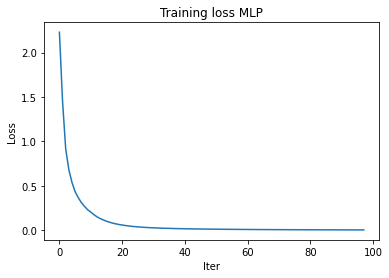

In [14]:
# Get training and test error for the best NN model found using CV
max_iter = 1000
mlp = MLPClassifier(**mlp_best_param, max_iter=max_iter, alpha=1e-4, solver='sgd', tol=1e-4,
                    learning_rate_init=.1,activation=best_activation_type, verbose=True)

mlp.fit(x_train, y_train)
training_error, test_error = training_error, test_error = 1-mlp.score(
    x_train, y_train), 1-mlp.score(x_test, y_test)

print ('\nRESULTS FOR BEST NN\n')

print ("Best NN training error: %f" % training_error)
print ("Best NN test error: %f" % test_error)

plt.plot(mlp.loss_curve_, label='Training Loss')
plt.title('Training loss MLP')
plt.xlabel('Iter'), plt.ylabel('Loss')

SVM confusion matrix: [[6583    4   42    8   20   42  125    4   22    4]
 [   4 7507   48   74   12   81   16   10   67    2]
 [  53   58 6196  116  206   33  105   64   87   22]
 [  18   69  224 6072   16  284   29   46  221  111]
 [   6   29   42   10 5931   11   66   42   42  596]
 [  54   97   34  163  101 5423  173   17  135   71]
 [  58   27   87   10  111   86 6434    0   14    0]
 [  27  194  170   11  133   31    3 6472   23  177]
 [  37  177  140  275   58  200   78   14 5703   94]
 [  29   58   62   87  374   54    7  260  101 5876]]
MLP confusion matrix: [[6424    1   81   29   14  105  149   12   28   11]
 [   2 7340   41   62   11   65   19   10  266    5]
 [  70   57 6026  178  127   24  210   90   70   88]
 [  22   61  281 5743   23  416   72   58  201  213]
 [  10   44   67    8 5659   36  145   41  115  650]
 [  89   74   58  254   65 4820  285   34  428  161]
 [  64   19  126    6   83   64 6420    2   43    0]
 [  47  248  206   26  132   27    4 6299   25  227]
 

(Text(0.5, 1.0, 'SVM'), Text(0.5, 1.0, 'MLP'))

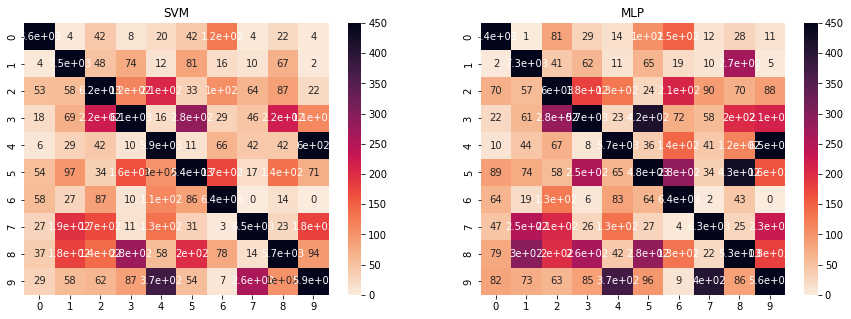

In [15]:
def find_and_print_first_mismatched_prediction(SVM_prediction : np.ndarray, NN_prediction : np.ndarray,
                                               x_test : np.ndarray, y_test : np.ndarray) -> int:
    '''
    Function to find and print the first digit that is missclassified by NN and correctly classified by SVM.
    :param SVM_prediction: SVM predicitons.
    :param NN_prediction: MLP predicitons.
    :param x_test: Test set inputs.
    :param y_test: Test set labels.
    
    :returns:
        i: returns the first index in which there is a mismatch between NN_prediction and true labels but no mismatch 
           between SVM_prediction and true labels. 
    '''
    i = 0
    found = False
    while ((not found) and (i<len(y_test))):
        if ((SVM_prediction[i] == y_test[i]) and (NN_prediction[i] != y_test[i])):
            found = True
        else:
            i += 1
        
    return i
    
    
def confusion_matrix_by_hand(true_labels : np.ndarray, predicted_labels : np.ndarray) -> np.ndarray:
    '''
    Function used to compute the confusion matrix given true and predicted labels. 
    :param true_labels: True labels.
    :param predicted_labels: Predicted labels (note this function does not require to know which model generated 
                             the predictions).
    
    :returns:
        confusion_matrix: Confusion matrix for the given true and predicted labels.
    '''
    labels = np.unique(true_labels)
    map_labels_to_index = {label:i for i, label in enumerate(labels)}
    confusion_matrix = np.zeros((len(labels), len(labels)))

    for t in range(len(true_labels)):
        
        confusion_matrix[int(true_labels[t])][int(predicted_labels[t])] += 1
               
    return confusion_matrix.astype(int)
#predicted & true labels
# Let's test our functions
SVM_prediction = best_SVM.predict(x_test)
NN_prediction = mlp.predict(x_test)


first_index = find_and_print_first_mismatched_prediction(SVM_prediction, NN_prediction, x_test, y_test)

SVM_CM = confusion_matrix_by_hand(y_test, SVM_prediction)
MLP_CM = confusion_matrix_by_hand(y_test, NN_prediction)

print(f'SVM confusion matrix: {SVM_CM}')
print(f'MLP confusion matrix: {MLP_CM}')

# Convert confusion matrices to pandas data frames
labels = np.unique(y_test)
SVM_CM_df = pd.DataFrame(SVM_CM, index = labels, columns = labels)
MLP_CM_df = pd.DataFrame(MLP_CM, index = labels, columns = labels)

# Plot confusion matrices
fig, axes = plt.subplots(1,2, figsize=(15,5))
sn.heatmap(SVM_CM_df, annot=True, ax=axes[0], cmap='rocket_r', vmax=450)
sn.heatmap(MLP_CM_df, annot=True, ax=axes[1], cmap='rocket_r', vmax=450)
axes[0].set_title('SVM'), axes[1].set_title('MLP')

In [16]:
from sklearn.metrics import confusion_matrix
skl_confusion_matrix_SVM = confusion_matrix(y_test, SVM_prediction)
skl_confusion_matrix_NN = confusion_matrix(y_test, NN_prediction)

In [17]:
from sklearn.metrics import confusion_matrix
skl_confusion_matrix_SVM = confusion_matrix(y_test, SVM_prediction)
skl_confusion_matrix_NN = confusion_matrix(y_test, NN_prediction)

assert np.sum(skl_confusion_matrix_SVM - SVM_CM) == 0
assert np.sum(skl_confusion_matrix_NN - MLP_CM) == 0


In [18]:
# More Data
# Now let's do the same but using more data points for training SVM and NN. 
# For SVM we are going to use the best hyperparameters set (kernel, C, gamma, ...) 
# found using 500 data points. For NN we are going to use the best architecture found using 
# 500 data points for the relu kernel since such architecture is usually fast to train.

In [19]:
#let restart the random generator with the given seed

m_t = 60000
x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=m_t/len(Y), stratify=Y)

print(f'Lenght train dataset: {len(y_train)}, Labels and frequencies: \n {list(zip(*np.unique(y_train, return_counts=True)))}')
print(f'Lenght test dataset: {len(y_test)}, Labels and frequencies: \n {list(zip(*np.unique(y_test, return_counts=True)))}')

Lenght train dataset: 60000, Labels and frequencies: 
 [('0', 5917), ('1', 6752), ('2', 5991), ('3', 6121), ('4', 5849), ('5', 5411), ('6', 5894), ('7', 6251), ('8', 5850), ('9', 5964)]
Lenght test dataset: 10000, Labels and frequencies: 
 [('0', 986), ('1', 1125), ('2', 999), ('3', 1020), ('4', 975), ('5', 902), ('6', 982), ('7', 1042), ('8', 975), ('9', 994)]


In [20]:
# As we did with the first HW let's use a decorator to measure time 
from collections import defaultdict
running_times = defaultdict(list)

def measure_time(function):
    def wrap(*args, **kw):
        import time 
        t_start = time.time()
        result = function(*args, **kw)
        t_end = time.time()
        running_times[type(args[0]).__name__].append(t_end - t_start)
        return result
    return wrap

@measure_time
def fit_classification_model(model, x_train, y_train):
    model.fit(x_train, y_train)

In [21]:
n_data = [250, 500, 1000, 2000, 5000, 7500]
svm_train_err, svm_test_err = [], [] 
mlp_train_err, mlp_test_err = [], [] 
for n in n_data: 
    print(f'Processing with {n} data ...')
    # Initialize models according to the best we got using 500 data
    svm = SVC(kernel=best_kernel_type, **best_parameters)
    mlp = MLPClassifier(**best_param_relu, max_iter=max_iter, alpha=1e-4, solver='sgd', tol=1e-4, 
                        learning_rate_init=.1,activation='relu')

    # fit svc
    fit_classification_model(svm, x_train[:n], y_train[:n])
    # get svc train and test error
    svm_train_err.append(1. - svm.score(x_train[:n], y_train[:n]))
    svm_test_err.append(1. - svm.score(x_test, y_test))
    
    # fit mlp
    fit_classification_model(mlp, x_train[:n], y_train[:n])
    # get mlp train and test error
    mlp_train_err.append(1. - mlp.score(x_train[:n], y_train[:n]))
    mlp_test_err.append(1. - mlp.score(x_test, y_test))

Processing with 250 data ...
Processing with 500 data ...
Processing with 1000 data ...
Processing with 2000 data ...
Processing with 5000 data ...
Processing with 7500 data ...


(<matplotlib.legend.Legend at 0x29b36876ca0>, Text(0.5, 1.0, 'Training Time'))

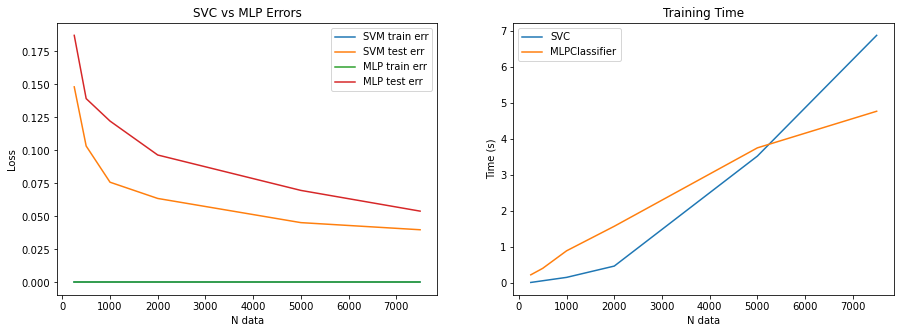

In [22]:
fig, axes = plt.subplots(1,2, figsize=(15, 5))
axes[0].plot(n_data, np.array(svm_train_err), label='SVM train err')
axes[0].plot(n_data, np.array(svm_test_err), label='SVM test err')
axes[0].plot(n_data, np.array(mlp_train_err), label='MLP train err')
axes[0].plot(n_data, np.array(mlp_test_err), label='MLP test err')
axes[0].set_xlabel('N data'), axes[0].set_ylabel('Loss')
axes[0].legend(), axes[0].set_title('SVC vs MLP Errors')

for model, times in running_times.items():
    axes[1].plot(n_data, times, label=model)
axes[1].set_xlabel('N data'), axes[1].set_ylabel('Time (s)')
axes[1].legend(), axes[1].set_title('Training Time')

In [23]:
#Just for comparison, since it may not be possible to learn a SVM on too many data 
#(due to time and memory complexity issues as you can notice from the plots above), 
#let's use logistic regression (with standard parameters from scikit-learn but 
#the number of iteration).

In [24]:
from sklearn import linear_model

# Fit and test a logistic regression model
max_iter = 1000

log_reg=linear_model.LogisticRegression(max_iter=max_iter)
log_reg.fit(x_train, y_train)

training_error_lr, test_error_lr = 1-log_reg.score(x_train, y_train), 1-log_reg.score(x_test, y_test)

print (f"Best logistic regression training error: {training_error_lr:.4f}")
print (f"Best logistic regression test error: {test_error_lr:.4f}")

Best logistic regression training error: 0.0606
Best logistic regression test error: 0.0779


In [25]:
#get training and test error for the best NN model from CV
best_mlp_large = MLPClassifier(**best_param_relu, max_iter=max_iter, alpha=1e-4, solver='sgd', tol=1e-4, 
                        learning_rate_init=.1,activation='relu')
best_mlp_large.fit(x_train, y_train)

training_error, test_error = 1-best_mlp_large.score(x_train, y_train), 1-best_mlp_large.score(x_test, y_test)

print ('\nRESULTS FOR BEST NN\n')

print (f"Best NN training error: {training_error:.4f}")
print (f"Best NN test error: {test_error:.4f}")


RESULTS FOR BEST NN

Best NN training error: 0.0000
Best NN test error: 0.0259


(Text(0.5, 1.0, 'MLP Train'), Text(0.5, 1.0, 'MLP Test'))

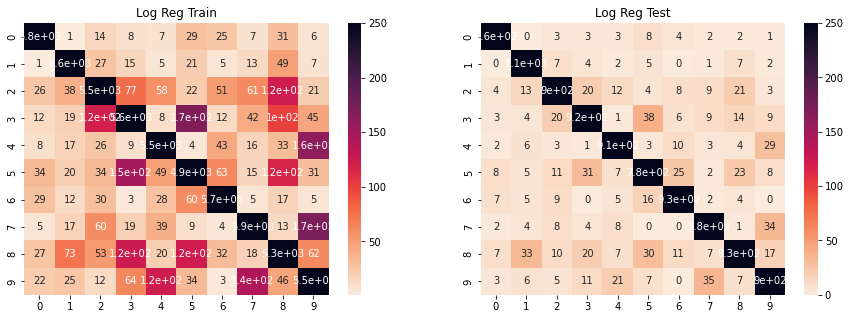

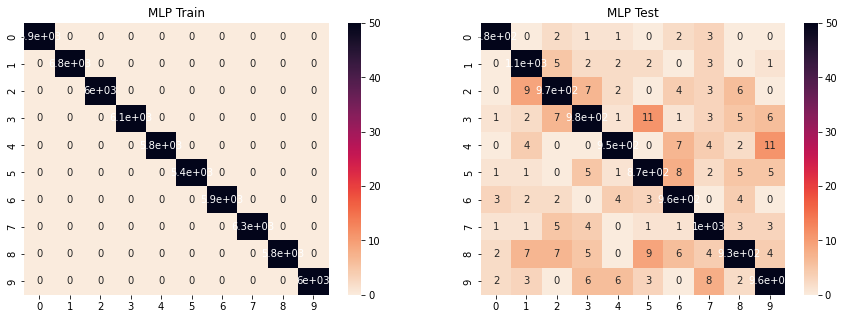

In [26]:
#Compute the confusion matrices both on train and test set for Logistic regression (trained on 60k)
# and MLP (trained on 60k).

# Log Reg Confusion matrices


log_reg_CM_train, log_reg_CM_test = confusion_matrix_by_hand(
    y_train, log_reg.predict(x_train)), confusion_matrix_by_hand(
        y_test, log_reg.predict(x_test))



# mlp
mlp_CM_train, mlp_CM_test = confusion_matrix_by_hand(
    y_train, best_mlp_large.predict(x_train)), confusion_matrix_by_hand(
    y_test, best_mlp_large.predict(x_test))

# Convert confusion matrices to pandas data frames
labels = np.unique(y_test)
log_reg_CM_train_df = pd.DataFrame(log_reg_CM_train, index = labels, columns = labels)
log_reg_CM_test_df = pd.DataFrame(log_reg_CM_test, index = labels, columns = labels)

mlp_CM_train_df = pd.DataFrame(mlp_CM_train, index = labels, columns = labels)
mlp_CM_test_df = pd.DataFrame(mlp_CM_test, index = labels, columns = labels)

# Plot confusion matrices
fig, axes = plt.subplots(1,2, figsize=(15,5))
sn.heatmap(log_reg_CM_train_df, annot=True, ax=axes[0], cmap='rocket_r', vmax=250)
sn.heatmap(log_reg_CM_test_df, annot=True, ax=axes[1], cmap='rocket_r', vmax=250)
axes[0].set_title('Log Reg Train'), axes[1].set_title('Log Reg Test')

fig, axes = plt.subplots(1,2, figsize=(15,5))
sn.heatmap(mlp_CM_train_df, annot=True, ax=axes[0], cmap='rocket_r', vmax=50)
sn.heatmap(mlp_CM_test_df, annot=True, ax=axes[1], cmap='rocket_r', vmax=50)
axes[0].set_title('MLP Train'), axes[1].set_title('MLP Test')

In [27]:
#Without data normalization

In [28]:
# data are restored to their original scale 
X = X*255.
print(X[1])

#train-test data split
x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=m_t/len(Y), stratify=Y)

[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.  51. 159. 253. 159.  50.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  48. 238. 252. 252. 252. 237.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  54.
 227. 253. 252. 239. 233. 252.  57.   6.   0.   0.   0.   0.   0.   0.
   0. 

In [29]:
best_mlp_large = MLPClassifier(hidden_layer_sizes=(50,50,), max_iter=max_iter, alpha=1e-4,activation='logistic', solver='sgd', tol=1e-4, 
                               random_state=None, learning_rate_init=.1, verbose=True)
best_mlp_large.fit(x_train, y_train)
training_error = 1. - best_mlp_large.score(x_train, y_train)
test_error = 1. - best_mlp_large.score(x_test, y_test)


print ('\nRESULTS FOR BEST NN\n')

print (f"Best NN training error: {training_error:.4f}")
print (f"Best NN test error: {test_error:.4f}")

Iteration 1, loss = 1.19095497
Iteration 2, loss = 1.14784937
Iteration 3, loss = 1.12488800
Iteration 4, loss = 1.07569369
Iteration 5, loss = 0.95089474
Iteration 6, loss = 0.93968932
Iteration 7, loss = 0.92928087
Iteration 8, loss = 0.88402297
Iteration 9, loss = 0.80574162
Iteration 10, loss = 0.94054815
Iteration 11, loss = 1.00191287
Iteration 12, loss = 0.87646331
Iteration 13, loss = 0.82749140
Iteration 14, loss = 0.85399506
Iteration 15, loss = 0.82910820
Iteration 16, loss = 0.83408041
Iteration 17, loss = 0.80229724
Iteration 18, loss = 0.79942847
Iteration 19, loss = 0.80593643
Iteration 20, loss = 0.85125477
Iteration 21, loss = 0.78811175
Iteration 22, loss = 0.80291652
Iteration 23, loss = 0.78079229
Iteration 24, loss = 0.77199727
Iteration 25, loss = 0.76224603
Iteration 26, loss = 0.71636076
Iteration 27, loss = 0.71546275
Iteration 28, loss = 0.68872517
Iteration 29, loss = 0.72489652
Iteration 30, loss = 0.75061877
Iteration 31, loss = 0.76984430
Iteration 32, los